In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('BayesHI')
import bayeshi

import importlib
importlib.reload(bayeshi.models)
importlib.reload(bayeshi)

<module 'bayeshi' from '/home/120/em8117/BayesHI/bayeshi/__init__.py'>

In [ ]:
traintest, valtest, testtest = bayeshi.load_data(dataset='all', tigress_sim=300, seta_sim='comp', split=300)

Splitting 300 samples across 3 simulations: 100 per simulation, with 0 extra samples distributed


In [ ]:
traintest, valtest, testtest = bayeshi.load_data(dataset='all', tigress_sim=300, seta_sim='comp', split='all')

In [ ]:
traintest, valtest, testtest = bayeshi.load_data(dataset='all', tigress_sim=300, seta_sim='comp', split={'tigress':10,'seta':10,'saury':10})

In [ ]:
traintest, valtest, testtest = bayeshi.load_data(dataset='all', tigress_sim=300, seta_sim='comp', split={'tigress':0.1,'seta':0.5,'saury':0.1})

In [ ]:
traintest, valtest, testtest = bayeshi.load_data(dataset='all', tigress_sim=300, seta_sim='comp', split={'tigress':0.1,'seta':0.5,'saury':0.4})

## Try and plot examples from the data

In [9]:
def hiep_plot(index, x, y, pred=None):
    vch_em = np.linspace(-70,70, 256)
    
    ## Plot
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12,12), sharex=True)

    ## Emission
    ax1.plot(vch_em, x[index], 'k-', label=r'$T_{b}$ (kh)')
    
    # ax1.set_title('', fontsize = 35)
    
    ax1.set_ylabel('$T_{b} [K]$', fontsize = 35)
    ax1.tick_params(axis='x', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.tick_params(axis='y', labelsize=20)
    ax1.legend(loc='upper left', fontsize=12)
    ax1.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=-10)
    
    
    ## Absorption
    ax2.plot(vch_em, np.exp(-y[index]), 'k-', label='True')
    if pred is not None:
        ax2.plot(vch_em, np.exp(-pred[index]), 'r-', label='Predicted')
    ax2.set_ylim(-0.05,1.05)
    
    ax2.set_ylabel(r'$e^{-\tau}$', fontsize = 35)
    ax2.set_xlabel('Vel [km/s]', fontsize = 35)
    ax2.tick_params(axis='x', labelsize=20)
    ax2.tick_params(axis='y', labelsize=20)
    # ax2.set_xlim(vlim1, vlim2)
    ax2.legend(loc='lower left', fontsize=12)
    
    ax2.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=-10)

    # Plot the tihings that the network is actually seeing and predicting
    ax3.plot(vch_em, y[index], 'k-', label='True')
    if pred is not None:
        ax3.plot(vch_em, pred[index], 'r-', label='Predicted')
    
    ax3.set_ylabel(r'$\tau$', fontsize = 35)
    ax3.set_xlabel('Vel [km/s]', fontsize = 35)
    ax3.tick_params(axis='x', labelsize=20)
    ax3.tick_params(axis='y', labelsize=20)
    # ax2.set_xlim(vlim1, vlim2)
    ax3.legend(loc='lower left', fontsize=12)
    
    ax2.grid(True, linestyle='--', linewidth=0.5, color='lightgray', zorder=-10)
    
    
    plt.subplots_adjust(left=None,
                        bottom=None,
                        right=None,
                        top=None,
                        wspace=0.15,
                        hspace=0.005
                        )
    
    # plt.savefig(src + '.png', bbox_inches='tight', pad_inches=0.09, format='png', dpi=150)
    
    plt.show()
    plt.close(fig)

Total number of spectra: 131072
Splitting data into 60% train, 20% validation, and 20% test sets.


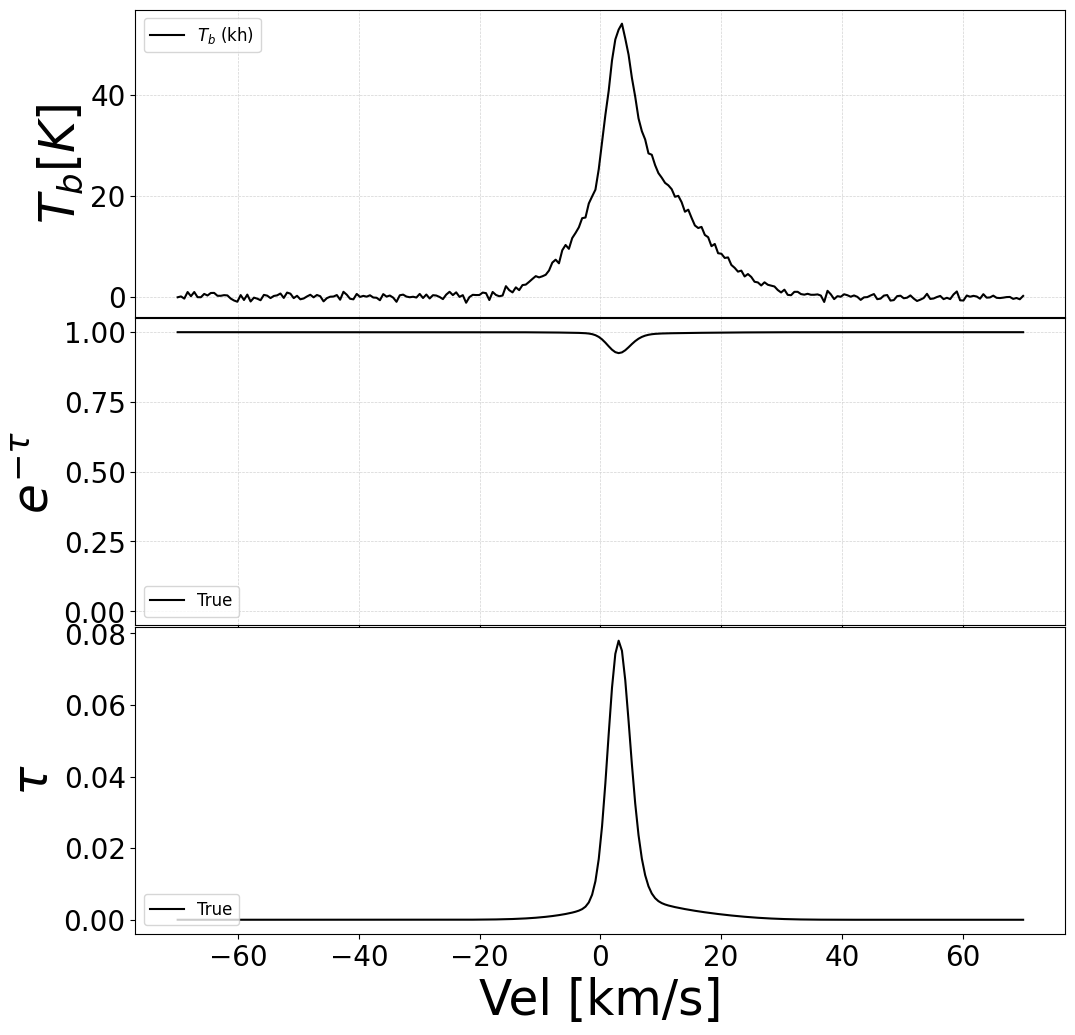

In [10]:
traintest, valtest, testtest = bayeshi.load_data(dataset='tigress', tigress_sim=300, y_values='absorption')

hiep_plot(1000, traintest.dataset.tensors[0], traintest.dataset.tensors[1])

Total number of spectra: 1048576
Splitting data into 60% train, 20% validation, and 20% test sets.


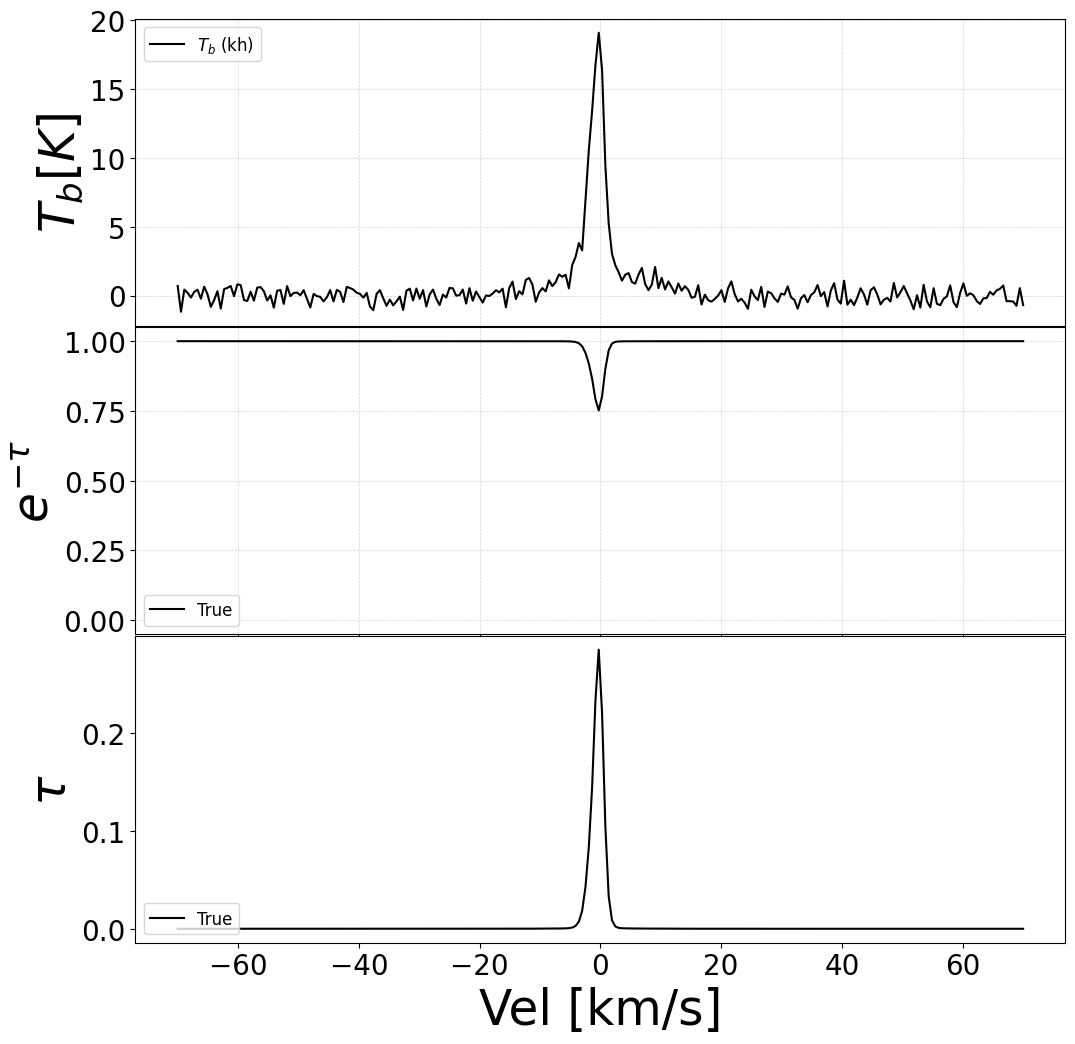

In [18]:
traintest, valtest, testtest = bayeshi.load_data(dataset='saury', y_values='absorption')

hiep_plot(6000, traintest.dataset.tensors[0], traintest.dataset.tensors[1])

Total number of spectra: 262144
Splitting data into 60% train, 20% validation, and 20% test sets.


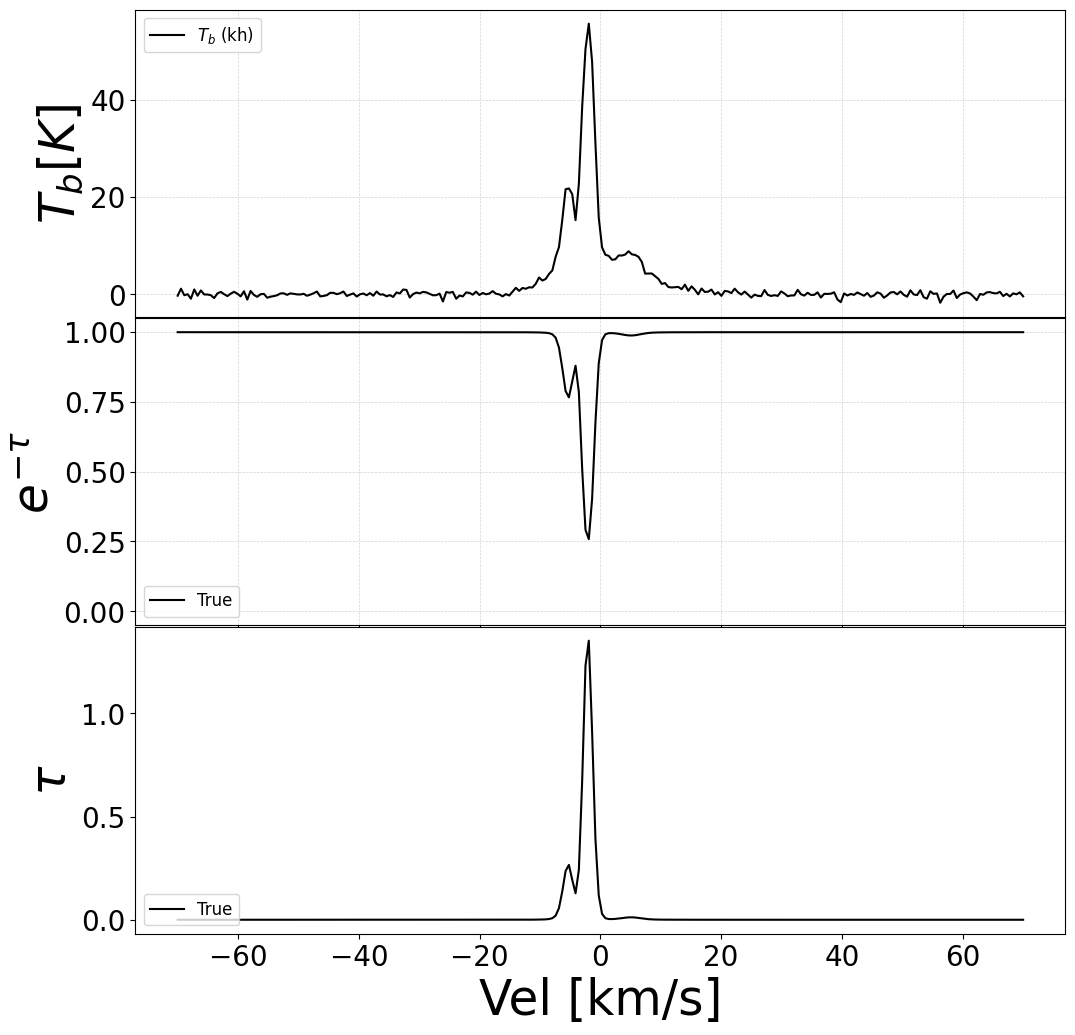

In [19]:
traintest, valtest, testtest = bayeshi.load_data(dataset='seta', y_values='absorption', seta_sim='comp')

hiep_plot(1000, traintest.dataset.tensors[0], traintest.dataset.tensors[1])